In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


from plotting_functions import *
import math
import csv
import time
from math import log
import networkx as nx
from os import listdir
import random
import io
from io import StringIO
import codecs
import math
from os.path import isfile, join
#from geopy.distance.geodesic import vincenty
# In[2]:
from math import *
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset, InsetPosition

d 10 capacity 6309.575 link_F 0.94 link_Fth 0.9 after swap F 0.78 target 0.9 final_n_avg 1.0 
for scheme nested, R_min=1 covered_distance is 1710 
d 10 capacity 6309.575 link_F 0.94 link_Fth 0.9 after swap F 0.78 target 0.9 final_n_avg 1.0 
for scheme nested, R_min=31 covered_distance is 1702 
d 10 capacity 6309.575 link_F 0.94 link_Fth 0.9 after swap F 0.78 target 0.9 final_n_avg 1.0 
for scheme nested, R_min=61 covered_distance is 1694 
d 10 capacity 6309.575 link_F 0.94 link_Fth 0.9 after swap F 0.78 target 0.9 final_n_avg 1.0 
for scheme nested, R_min=91 covered_distance is 1686 
d 15 capacity 5011.87 link_F 0.94 link_Fth 0.9 after swap F 0.78 target 0.9 final_n_avg 1.0 
for scheme nested, R_min=1 covered_distance is 1358 
d 15 capacity 5011.87 link_F 0.94 link_Fth 0.9 after swap F 0.78 target 0.9 final_n_avg 1.0 
for scheme nested, R_min=31 covered_distance is 1350 
d 15 capacity 5011.87 link_F 0.94 link_Fth 0.9 after swap F 0.78 target 0.9 final_n_avg 1.0 
for scheme nested, R_mi

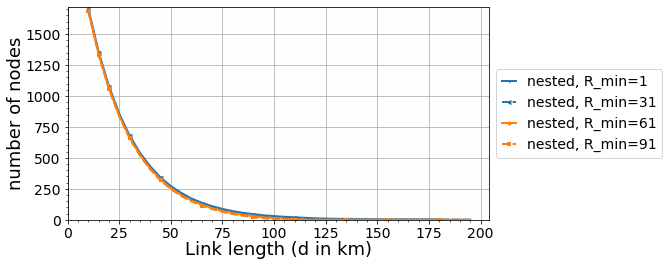

In [20]:
def get_avg_epr_pairs_DEJMPS(F_init,F_target):
    F_curr = F_init
    F2 = F3 = F4 = (1-F_curr)/3
    n_avg = 1.0
    while(F_curr < F_target):
        F_curr,F2, F3, F4, succ_prob = get_next_fidelity_and_succ_prob_DEJMPS(F_curr, F2, F3, F4)
        n_avg = n_avg*(2/succ_prob)
    return  n_avg
    
def get_next_fidelity_and_succ_prob_DEJMPS(F1,F2,F3,F4):
    succ_prob = (F1+F2)**2 + (F3+F4)**2
    output_fidelity1 = (F1**2 + F2**2)/succ_prob
    output_fidelity2 = (2*F3*F4)/succ_prob
    output_fidelity3 = (F3**2 + F4**2)/succ_prob
    output_fidelity4 = (2*F1*F2)/succ_prob

    return output_fidelity1, output_fidelity2, output_fidelity3, output_fidelity4, succ_prob 


for link_level_Fth in [0.9]:
    each_scheme_link_lenght_covered_distance = {}
    selected_values = []
    scheme_keys = []
    d_values = set([])
    for d in range(10,200,5):
        for R_min in range(1,100,30):
            c = 1
            etha = 10**(-0.1*0.2*d)
            T=1 * 10**(-3)
            alpha = 1
            capacity = 5*round((2*c*etha*alpha)/T,3)
            link_F  = 0.94
            target_F = 0.9
            one_before_end_swap_F  = (link_level_Fth)*((4*link_level_Fth-1)/3)
            after_swap_F = link_level_Fth
            final_n_avg = get_avg_epr_pairs_DEJMPS(link_level_Fth ,target_F)
            counter = 0
            if final_n_avg>=capacity:
                covered_distance = d
            else:
                covered_distance = 0
            print("d %s capacity %s link_F %s link_Fth %s after swap F %s target %s final_n_avg %s "%(d,capacity,link_F,link_level_Fth,one_before_end_swap_F,target_F,final_n_avg))
            while(capacity-final_n_avg>R_min):
                n_avg = get_avg_epr_pairs_DEJMPS(after_swap_F ,link_level_Fth)
                counter+=1
                capacity = capacity-n_avg
                after_swap_F= (link_level_Fth)*((4*link_level_Fth-1)/3)
#                 print("R_min %s one swap happened consumed %s new capacity %s "%(R_min,n_avg,capacity),end="\r")
            covered_distance = counter*2
            scheme = "nested, R_min="+str(R_min)
            print("for scheme %s covered_distance is %s "%(scheme,covered_distance))
            if scheme not in scheme_keys:
                scheme_keys.append(scheme)
            try:
                each_scheme_link_lenght_covered_distance[scheme][d] = covered_distance
            except:
                each_scheme_link_lenght_covered_distance[scheme] = {}
                each_scheme_link_lenght_covered_distance[scheme][d] = covered_distance
            selected_values.append(covered_distance)
            d_values.add(d)

    d_values  = list(d_values)
    d_values.sort()
    ploting_simple_y_as_x("Link length (d in km)","number of nodes",
                            18, 18, 14,
                          14, 0, 0,
                          0,0,False,[],max(selected_values)+10,

                          list(scheme_keys),
                          each_scheme_link_lenght_covered_distance,
                          d_values,d_values,
                          False,True,True,1,14,
                          "plots/scalability_results"+str(link_level_Fth)+".pdf",True,2,9.4,3.8,True)

d 10 capacity 6309.575 link_F 0.94 link_Fth 0.9 after swap F 0.78 target 0.9 final_n_avg 1.0 
for scheme sequential, R_min=1 covered_distance is 855 
d 10 capacity 6309.575 link_F 0.94 link_Fth 0.9 after swap F 0.78 target 0.9 final_n_avg 1.0 
for scheme sequential, R_min=31 covered_distance is 851 
d 10 capacity 6309.575 link_F 0.94 link_Fth 0.9 after swap F 0.78 target 0.9 final_n_avg 1.0 
for scheme sequential, R_min=61 covered_distance is 847 
d 10 capacity 6309.575 link_F 0.94 link_Fth 0.9 after swap F 0.78 target 0.9 final_n_avg 1.0 
for scheme sequential, R_min=91 covered_distance is 843 
d 15 capacity 5011.87 link_F 0.94 link_Fth 0.9 after swap F 0.78 target 0.9 final_n_avg 1.0 
for scheme sequential, R_min=1 covered_distance is 679 
d 15 capacity 5011.87 link_F 0.94 link_Fth 0.9 after swap F 0.78 target 0.9 final_n_avg 1.0 
for scheme sequential, R_min=31 covered_distance is 675 
d 15 capacity 5011.87 link_F 0.94 link_Fth 0.9 after swap F 0.78 target 0.9 final_n_avg 1.0 
for s

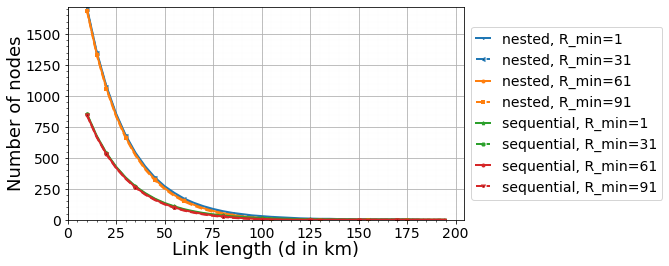

In [21]:
d_values = set(d_values)
for link_level_Fth in [0.9]:
    for d in range(10,200,5):
        for R_min in range(1,100,30):
            c = 1
            etha = 10**(-0.1*0.2*d)
            T=1 * 10**(-3)
            alpha = 1
            capacity = 5*round((2*c*etha*alpha)/T,3)
            link_F  = 0.94
            target_F = 0.9
            one_before_end_swap_F  = (link_level_Fth)*((4*link_level_Fth-1)/3)
            after_swap_F = link_level_Fth
            final_n_avg = get_avg_epr_pairs_DEJMPS(link_level_Fth ,target_F)
            counter = 0
            if final_n_avg>=capacity:
                covered_distance = d
            else:
                covered_distance = 0
            print("d %s capacity %s link_F %s link_Fth %s after swap F %s target %s final_n_avg %s "%(d,capacity,link_F,link_level_Fth,one_before_end_swap_F,target_F,final_n_avg))
            while(capacity-final_n_avg>R_min):
                n_avg = get_avg_epr_pairs_DEJMPS(after_swap_F ,link_level_Fth)
                counter+=1
                capacity = capacity-n_avg
                after_swap_F= (link_level_Fth)*((4*link_level_Fth-1)/3)
#                 print("R_min %s one swap happened consumed %s new capacity %s "%(R_min,n_avg,capacity),end="\r")
            covered_distance = counter
            scheme = "sequential, R_min="+str(R_min)
            print("for scheme %s covered_distance is %s "%(scheme,covered_distance))
            if scheme not in scheme_keys:
                scheme_keys.append(scheme)
            try:
                each_scheme_link_lenght_covered_distance[scheme][d] = covered_distance
            except:
                each_scheme_link_lenght_covered_distance[scheme] = {}
                each_scheme_link_lenght_covered_distance[scheme][d] = covered_distance
            selected_values.append(covered_distance)
            d_values.add(d)

    d_values  = list(d_values)
    d_values.sort()
    ploting_simple_y_as_x("Link length (d in km)","Number of nodes",
                            18, 18, 14,
                          14, 0, 0,
                          0,0,False,[],max(selected_values)+10,

                          list(scheme_keys),
                          each_scheme_link_lenght_covered_distance,
                          d_values,d_values,
                          False,True,True,1,14,
                          "plots/n_results"+str(link_level_Fth)+".pdf",True,2,9.4,3.8,True)

we get the values for scheme nested, R_min=1 point 10 17100
we get the values for scheme nested, R_min=1 point 15 20370
we get the values for scheme nested, R_min=1 point 20 21600
we get the values for scheme nested, R_min=1 point 25 21450
we get the values for scheme nested, R_min=1 point 30 20460
we get the values for scheme nested, R_min=1 point 35 18970
we get the values for scheme nested, R_min=1 point 40 17280
we get the values for scheme nested, R_min=1 point 45 15390
we get the values for scheme nested, R_min=1 point 50 13600
we get the values for scheme nested, R_min=1 point 55 11990
we get the values for scheme nested, R_min=1 point 60 10320
we get the values for scheme nested, R_min=1 point 65 8970
we get the values for scheme nested, R_min=1 point 70 7700
we get the values for scheme nested, R_min=1 point 75 6600
we get the values for scheme nested, R_min=1 point 80 5600
we get the values for scheme nested, R_min=1 point 85 4760
we get the values for scheme nested, R_min=1 

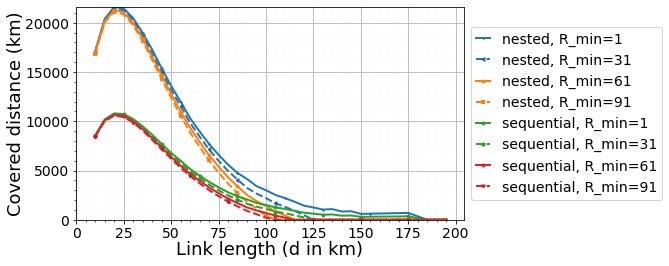

In [19]:
ploting_simple_y_as_x("Link length (d in km)","Covered distance (km)",
                            18, 18, 14,
                          14, 0, 0,
                          0,0,False,[],max(selected_values)+10,

                          list(scheme_keys),
                          each_scheme_link_lenght_covered_distance,
                          d_values,d_values,
                          False,True,True,1,14,
                          "plots/scalability_results"+str(link_level_Fth)+".pdf",True,2,9.4,3.8,True)

In [ ]:

scheme_keys = set([])
τ_coh_values  =set([])
each_scheme_each_coherence_time_all_workloads = {}
each_scheme_each_coherence_time_workloads  ={}

# result_file_path = "../../QSN_results/QSN_resultsv3.csv" #for intermediate edge capacity 300 EPRps
# result_file_path = "../../QSN_results/QSN_resultsv2.csv" #for intermediate edge capacity 100 EPRps
result_file_path = "../../QSN_results/QSN_results_final.csv" #for intermediate edge capacity 100 EPRps
result_file_path = "../../QSN_results/QSN_results_finalv2.csv" #for intermediate edge capacity 100 EPRps
result_file_path = "../../QSN_results/QSN_results_final_maximizing_rate.csv" #for intermediate edge capacity 100 EPRps



with open(result_file_path, "r") as f:
    reader = csv.reader( (line.replace('\0','') for line in f) )
    for line in reader:#t_max,i,request_fidelity_threshold,
#                                           storage_block_threshold,
#                                           storage_capacity,τ_coh,service_delay
        # print()
        t_max = int(line[0])
        i = line[1]
        request_fidelity_threshold= float(line[2])
        storage_block_threshold= float(line[3])
        storage_capacity = int(line[4])
        τ_coh = float(line[5])
        delta = float(line[6])
        objective_value = float(line[7])
#         print("objective_value",objective_value)
        if objective_value==-1:
            objective_value = 0
        else:
            objective_value = 1
        if  ( t_max in [10] and request_fidelity_threshold in [0.8]  and 
             storage_block_threshold in [0.7,0.8,0.85,0.9]
            ):
            scheme = "Strg_Fth = "+str(storage_block_threshold)+",Stg_C="+str(storage_capacity)+",delat"+str(delta)
            try:
                each_scheme_each_coherence_time_workloads[scheme][τ_coh]+=objective_value
            except:
                try:
                    each_scheme_each_coherence_time_workloads[scheme][τ_coh]= objective_value
                except:
                    each_scheme_each_coherence_time_workloads[scheme]={}
                    each_scheme_each_coherence_time_workloads[scheme][τ_coh]=objective_value
            try:
                each_scheme_each_coherence_time_all_workloads[scheme][τ_coh]+=1
            except:
                try:
                    each_scheme_each_coherence_time_all_workloads[scheme][τ_coh]= 1
                except:
                    each_scheme_each_coherence_time_all_workloads[scheme]={}
                    each_scheme_each_coherence_time_all_workloads[scheme][τ_coh]=1
         
            τ_coh_values.add(τ_coh)
            if scheme not in scheme_keys:
                scheme_keys.add(scheme)


selected_values = []
each_scheme_each_coherence_time_workloads_percentage = {}
for scheme,τ_coh_value_satisfied_number in each_scheme_each_coherence_time_workloads.items():
    for τ_coh,satisfied_number in τ_coh_value_satisfied_number.items():
        
        percentage = satisfied_number/each_scheme_each_coherence_time_all_workloads[scheme][τ_coh]*100
        try:
            each_scheme_each_coherence_time_workloads_percentage[scheme][τ_coh] = percentage
        except:
            each_scheme_each_coherence_time_workloads_percentage[scheme]  ={}
            each_scheme_each_coherence_time_workloads_percentage[scheme][τ_coh]=percentage
        selected_values.append(percentage)
        
        
τ_coh_values = list(τ_coh_values)
τ_coh_values.sort()
scheme_keys = list(scheme_keys)

ploting_simple_y_as_x("Coherence time (sec)","Percentage of satisfied workloads",
                        18, 18, 14,
                      14, 0, 0,
                      0,0,False,[],max(selected_values)+10,
                      
                      list(scheme_keys),
                      each_scheme_each_coherence_time_workloads_percentage,
                      τ_coh_values,τ_coh_values,
                      False,True,True,6,2,
                      "plots/QSN_repeater_chain_workload_as_coh_time.pdf",True,2,6.4,3.8,False)

[1.0, 2.163265306122449, 2.5510204081632653, 1.7755102040816326, 1.3877551020408163, 2.9387755102040813, 3.326530612244898, 3.7142857142857144, 4.1020408163265305, 4.489795918367347, 4.877551020408163, 5.26530612244898, 5.653061224489796, 6.040816326530612, 6.428571428571429, 7.204081632653061, 8.36734693877551, 9.142857142857142, 10.306122448979592, 11.081632653061224, 12.244897959183673, 13.020408163265305, 14.183673469387754, 15.346938775510203, 16.122448979591837, 17.285714285714285, 18.06122448979592, 19.224489795918366, 20.0, 7.979591836734693, 8.755102040816325, 9.53061224489796, 9.918367346938775, 10.693877551020408, 11.46938775510204, 11.857142857142858, 12.63265306122449, 13.408163265306122, 13.795918367346939, 14.571428571428571, 14.959183673469386, 15.73469387755102, 16.51020408163265, 16.89795918367347, 17.6734693877551, 18.448979591836736, 18.83673469387755, 6.816326530612245, 19.612244897959183, 7.591836734693877]
[20]
we get the values for scheme model:worst,Req.Fth=0.9

/Users/shahrooz/PhD_research_projects/QSN/plotting/plotting_functions.py:335: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(y_axis_provided_min_value, y_axis_provided_max_value)


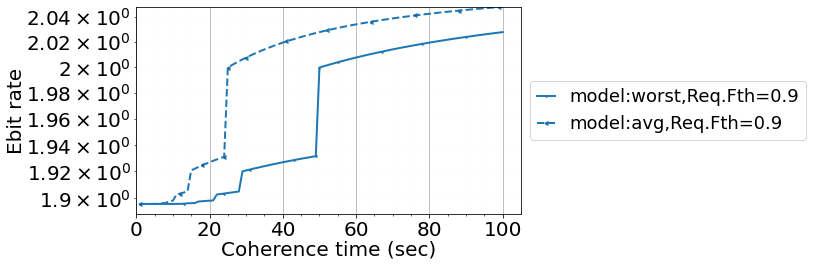

In [43]:
delta_values = set([])
scheme_keys = set([])
τ_coh_values  =set([])
t_max_values = set([])
each_scheme_each_coherence_time_all_workloads = {}
each_scheme_each_coherence_time_workloads  ={}

# result_file_path = "../../QSN_results/QSN_resultsv3.csv" #for intermediate edge capacity 300 EPRps
# result_file_path = "../../QSN_results/QSN_resultsv2.csv" #for intermediate edge capacity 100 EPRps
result_file_path = "../../QSN_results/QSN_results_final_maximizing_rate.csv" #for intermediate edge capacity 100 EPRps


result_file_path = "../../QSN_results/QSN_results_final_maximizing_rate_doceherence_assumption.csv" #for intermediate edge capacity 100 EPRps


with open(result_file_path, "r") as f:
    reader = csv.reader( (line.replace('\0','') for line in f) )
    for line in reader:#t_max,i,request_fidelity_threshold,
#                                           storage_block_threshold,
#                                           storage_capacity,τ_coh,service_delay
        # print()
        t_max = int(line[0])
        i = line[1]
        request_fidelity_threshold= float(line[2])
        storage_block_threshold= float(line[3])
        storage_capacity = int(line[4])
        τ_coh = float(line[5])
        delta = float(line[6])
        objective_value = float(line[7])
        edge_capacity = int(line[8])
        decoherence_assumption = line[11]
#         print("objective_value",objective_value)
        delta_values.add(delta)
        t_max_values.add(t_max)
        if  ( t_max in [20] and request_fidelity_threshold in [0.9,0.94,0.8]  and 
             storage_block_threshold in [0.9] and 
             delta in [10.693877551020408] and edge_capacity in [200] and storage_capacity in [1000]
            ):
            scheme = "model:"+str(decoherence_assumption)+",Req.Fth="+str(request_fidelity_threshold)
            try:
                each_scheme_each_coherence_time_workloads[scheme][τ_coh].append(objective_value)
            except:
                try:
                    each_scheme_each_coherence_time_workloads[scheme][τ_coh]= [objective_value]
                except:
                    each_scheme_each_coherence_time_workloads[scheme]={}
                    each_scheme_each_coherence_time_workloads[scheme][τ_coh]=[objective_value]
            
         
            τ_coh_values.add(τ_coh)
            if scheme not in scheme_keys:
                scheme_keys.add(scheme)

print(list(delta_values))
print(list(t_max_values))
selected_values = []
each_scheme_each_coherence_time_workloads_percentage = {}
for scheme,τ_coh_value_satisfied_number in each_scheme_each_coherence_time_workloads.items():
    for τ_coh,values in τ_coh_value_satisfied_number.items():
        
        avg_EGR = sum(values)/len(values)
        try:
            each_scheme_each_coherence_time_workloads_percentage[scheme][τ_coh] = avg_EGR
        except:
            each_scheme_each_coherence_time_workloads_percentage[scheme]  ={}
            each_scheme_each_coherence_time_workloads_percentage[scheme][τ_coh]=avg_EGR
        selected_values.append(avg_EGR)
        
        
τ_coh_values = list(τ_coh_values)
τ_coh_values.sort()
scheme_keys = list(scheme_keys)

ploting_simple_y_as_x("Coherence time (sec)","Ebit rate",
                        20, 20, 20,
                      20, 0, 0,
                      0,0,False,[],max(selected_values),
                      
                      list(scheme_keys),
                      each_scheme_each_coherence_time_workloads_percentage,
                      τ_coh_values,τ_coh_values,
                      True,True,True,1,18,
                      "plots/QSN_repeater_chain_ebit_as_coh_time.pdf",True,2,11.4,3.8,True)

In [ ]:
τ_coh_list = np.linspace(10,10,1)
print(τ_coh_list)

we get the values for scheme No storage, τ_coh =10sec point 1.0 0.8822354464027311
we get the values for scheme No storage, τ_coh =10sec point 1.3877551020408163 0.8822354464027311
we get the values for scheme No storage, τ_coh =10sec point 1.7755102040816326 0.8822354464027311
we get the values for scheme No storage, τ_coh =10sec point 2.163265306122449 0.8822354464027311
we get the values for scheme No storage, τ_coh =10sec point 2.5510204081632653 0.8822354464027311
we get the values for scheme No storage, τ_coh =10sec point 2.9387755102040813 0.8822354464027311
we get the values for scheme No storage, τ_coh =10sec point 3.326530612244898 0.8822354464027311
we get the values for scheme No storage, τ_coh =10sec point 3.7142857142857144 0.8822354464027311
we get the values for scheme No storage, τ_coh =10sec point 4.1020408163265305 0.8822354464027311
we get the values for scheme No storage, τ_coh =10sec point 4.489795918367347 0.8822354464027311
we get the values for scheme No storag

/Users/shahrooz/PhD_research_projects/QSN/plotting/plotting_functions.py:335: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(y_axis_provided_min_value, y_axis_provided_max_value)


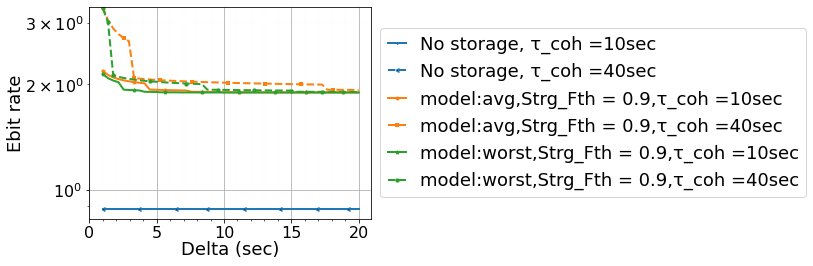

In [42]:

scheme_keys = set([])
τ_coh_values  =set([])
each_scheme_each_coherence_time_all_workloads = {}
each_scheme_each_coherence_time_workloads  ={}

# result_file_path = "../../QSN_results/QSN_resultsv3.csv" #for intermediate edge capacity 300 EPRps
# result_file_path = "../../QSN_results/QSN_resultsv2.csv" #for intermediate edge capacity 100 EPRps
result_file_path = "../../QSN_results/QSN_results_final_maximizing_rate.csv" #for intermediate edge capacity 100 EPRps

result_file_path = "../../QSN_results/QSN_results_final_maximizing_rate_doceherence_assumption.csv" #for intermediate edge capacity 100 EPRps

with open(result_file_path, "r") as f:
    reader = csv.reader( (line.replace('\0','') for line in f) )
    for line in reader:#t_max,i,request_fidelity_threshold,
#                                           storage_block_threshold,
#                                           storage_capacity,τ_coh,service_delay
        # print()
        t_max = int(line[0])
        i = line[1]
        request_fidelity_threshold= float(line[2])
        storage_block_threshold= float(line[3])
        storage_capacity = int(line[4])
        τ_coh = float(line[5])
        delta = float(line[6])
        objective_value = float(line[7])
        edge_capacity = int(line[8])
        decoherence_assumption = line[11]
#         print(τ_coh)
#         print("objective_value",objective_value)
        
        if  ( t_max in [20] and request_fidelity_threshold in [0.9]  and 
             storage_block_threshold in [0.9] and 
              edge_capacity in [200] and delta <40 and storage_capacity in [1000] and τ_coh in [40.0,10.0]
            ):
            scheme = "model:"+str(decoherence_assumption)+",Strg_Fth = "+str(storage_block_threshold)+",τ_coh ="+str(int(τ_coh))+"sec"
            try:
                each_scheme_each_coherence_time_workloads[scheme][delta].append(objective_value)
            except:
                try:
                    each_scheme_each_coherence_time_workloads[scheme][delta]= [objective_value]
                except:
                    each_scheme_each_coherence_time_workloads[scheme]={}
                    each_scheme_each_coherence_time_workloads[scheme][delta]=[objective_value]
                    
            if scheme not in scheme_keys:
                scheme_keys.add(scheme)
            τ_coh_values.add(delta)
            scheme2 = "No storage, τ_coh ="+str(int(τ_coh))+"sec"
            no_storage_ebit_rate = 2.646706339208193
            no_storage_ebit_rate = 0.8822354464027311
            try:
                each_scheme_each_coherence_time_workloads[scheme2][delta].append(no_storage_ebit_rate)
            except:
                try:
                    each_scheme_each_coherence_time_workloads[scheme2][delta]= [no_storage_ebit_rate]
                except:
                    each_scheme_each_coherence_time_workloads[scheme2]={}
                    each_scheme_each_coherence_time_workloads[scheme2][delta]=[no_storage_ebit_rate]
         
            
            if scheme2 not in scheme_keys:
                scheme_keys.add(scheme2)


selected_values = []
each_scheme_each_coherence_time_workloads_percentage = {}
for scheme,τ_coh_value_satisfied_number in each_scheme_each_coherence_time_workloads.items():
    for τ_coh,values in τ_coh_value_satisfied_number.items():
        
        avg_EGR = sum(values)/len(values)
        try:
            each_scheme_each_coherence_time_workloads_percentage[scheme][τ_coh] = avg_EGR
        except:
            each_scheme_each_coherence_time_workloads_percentage[scheme]  ={}
            each_scheme_each_coherence_time_workloads_percentage[scheme][τ_coh]=avg_EGR
        selected_values.append(avg_EGR)
        
        
τ_coh_values = list(τ_coh_values)
τ_coh_values.sort()
scheme_keys = list(scheme_keys)
scheme_keys.sort()
ploting_simple_y_as_x("Delta (sec)","Ebit rate",
                        18, 18, 16,
                      16, 0, 0,
                      0,0,False,[],max(selected_values),
                      
                      list(scheme_keys),
                      each_scheme_each_coherence_time_workloads_percentage,
                      τ_coh_values,τ_coh_values,
                      True,True,True,1,18,
                      "plots/QSN_repeater_chain_ebit_as_delta.pdf",True,2,11.4,3.8,True)

we get the values for scheme No storage,Req_Fth = 0.8 point 0.7 0.8822354464027311
we get the values for scheme No storage,Req_Fth = 0.8 point 0.8 0.8822354464027311
we get the values for scheme No storage,Req_Fth = 0.8 point 0.85 0.8822354464027311
we get the values for scheme No storage,Req_Fth = 0.8 point 0.9 0.8822354464027311
we get the values for scheme No storage,Req_Fth = 0.8 point 0.94 0.8822354464027311
we get the values for scheme No storage,Req_Fth = 0.8 point 0.96 0.8822354464027311
we get the values for scheme No storage,Req_Fth = 0.94 point 0.7 0.8822354464027311
we get the values for scheme No storage,Req_Fth = 0.94 point 0.8 0.8822354464027311
we get the values for scheme No storage,Req_Fth = 0.94 point 0.85 0.8822354464027311
we get the values for scheme No storage,Req_Fth = 0.94 point 0.9 0.8822354464027311
we get the values for scheme No storage,Req_Fth = 0.94 point 0.94 0.8822354464027311
we get the values for scheme No storage,Req_Fth = 0.94 point 0.96 0.882235446

/Users/shahrooz/PhD_research_projects/QSN/plotting/plotting_functions.py:335: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(y_axis_provided_min_value, y_axis_provided_max_value)


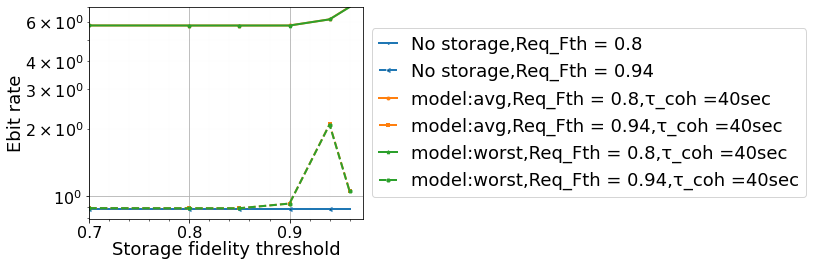

In [46]:

scheme_keys = set([])
storage_Fth_values  =set([])
each_scheme_each_coherence_time_all_workloads = {}
each_scheme_each_coherence_time_workloads  ={}

# result_file_path = "../../QSN_results/QSN_resultsv3.csv" #for intermediate edge capacity 300 EPRps
# result_file_path = "../../QSN_results/QSN_resultsv2.csv" #for intermediate edge capacity 100 EPRps
result_file_path = "../../QSN_results/QSN_results_final_maximizing_rate.csv" #for intermediate edge capacity 100 EPRps

result_file_path = "../../QSN_results/QSN_results_final_maximizing_rate_doceherence_assumption.csv" #for intermediate edge capacity 100 EPRps

with open(result_file_path, "r") as f:
    reader = csv.reader( (line.replace('\0','') for line in f) )
    for line in reader:#t_max,i,request_fidelity_threshold,
#                                           storage_block_threshold,
#                                           storage_capacity,τ_coh,service_delay
        # print()
        t_max = int(line[0])
        i = line[1]
        request_fidelity_threshold= float(line[2])
        storage_block_threshold= float(line[3])
        storage_capacity = int(line[4])
        τ_coh = float(line[5])
        delta = float(line[6])
        objective_value = float(line[7])
        edge_capacity = int(line[8])
        decoherence_assumption = line[11]
#         print(τ_coh)
#         print("objective_value",objective_value)
        
        if  ( t_max in [20] and request_fidelity_threshold in [0.9,0.94,0.8]  and 
             
              edge_capacity in [200] and delta in [40] and storage_capacity in [1000] and τ_coh in [40.0]
            ):
            scheme = "model:"+str(decoherence_assumption)+",Req_Fth = "+str(request_fidelity_threshold)+",τ_coh ="+str(int(τ_coh))+"sec"
            try:
                each_scheme_each_coherence_time_workloads[scheme][storage_block_threshold].append(objective_value)
            except:
                try:
                    each_scheme_each_coherence_time_workloads[scheme][storage_block_threshold]= [objective_value]
                except:
                    each_scheme_each_coherence_time_workloads[scheme]={}
                    each_scheme_each_coherence_time_workloads[scheme][storage_block_threshold]=[objective_value]
                    
            if scheme not in scheme_keys:
                scheme_keys.add(scheme)
            storage_Fth_values.add(storage_block_threshold)
            scheme2 = "No storage,"+"Req_Fth = "+str(request_fidelity_threshold)
            no_storage_ebit_rate = 2.646706339208193
            no_storage_ebit_rate = 0.8822354464027311
            try:
                each_scheme_each_coherence_time_workloads[scheme2][storage_block_threshold].append(no_storage_ebit_rate)
            except:
                try:
                    each_scheme_each_coherence_time_workloads[scheme2][storage_block_threshold]= [no_storage_ebit_rate]
                except:
                    each_scheme_each_coherence_time_workloads[scheme2]={}
                    each_scheme_each_coherence_time_workloads[scheme2][storage_block_threshold]=[no_storage_ebit_rate]
         
            
            if scheme2 not in scheme_keys:
                scheme_keys.add(scheme2)


selected_values = []
each_scheme_each_coherence_time_workloads_percentage = {}
for scheme,τ_coh_value_satisfied_number in each_scheme_each_coherence_time_workloads.items():
    for τ_coh,values in τ_coh_value_satisfied_number.items():
        
        avg_EGR = sum(values)/len(values)
        try:
            each_scheme_each_coherence_time_workloads_percentage[scheme][τ_coh] = avg_EGR
        except:
            each_scheme_each_coherence_time_workloads_percentage[scheme]  ={}
            each_scheme_each_coherence_time_workloads_percentage[scheme][τ_coh]=avg_EGR
        selected_values.append(avg_EGR)
        
        
storage_Fth_values = list(storage_Fth_values)
storage_Fth_values.sort()
scheme_keys = list(scheme_keys)
scheme_keys.sort()
ploting_simple_y_as_x("Storage fidelity threshold","Ebit rate",
                        18, 18, 16,
                      16, 0, 0,
                      min(storage_Fth_values),0,False,[],max(selected_values),
                      
                      list(scheme_keys),
                      each_scheme_each_coherence_time_workloads_percentage,
                      storage_Fth_values,storage_Fth_values,
                      True,True,True,1,18,
                      "plots/QSN_repeater_chain_ebit_as_storage_Fth.pdf",True,2,11.4,3.8,True)

In [47]:
import numpy as np
storage_block_thresholds = np.linspace(0.7,0.99,20)
print(storage_block_thresholds)

[0.7        0.71526316 0.73052632 0.74578947 0.76105263 0.77631579
 0.79157895 0.80684211 0.82210526 0.83736842 0.85263158 0.86789474
 0.88315789 0.89842105 0.91368421 0.92894737 0.94421053 0.95947368
 0.97473684 0.99      ]


In [ ]:
# plotting 3D Ebit rate as coherence and delta time

# With storage capacity 400 and 1000

# with intermediate edge capacity 200 and 400

τ_coh_values  [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0]
delta_values [1.0, 1.3877551020408163, 1.7755102040816326, 2.163265306122449, 2.5510204081632653, 2.9387755102040813, 3.326530612244898, 3.7142857142857144, 4.1020408163265305, 4.489795918367347, 4.877551020408163, 5.26530612244898, 5.653061224489796, 6.040816326530612, 6.428571428571429, 6.816326530612245, 7.204081632653061, 7.591836734693877, 7.979591836734693, 8.36734693877551, 8.7551020

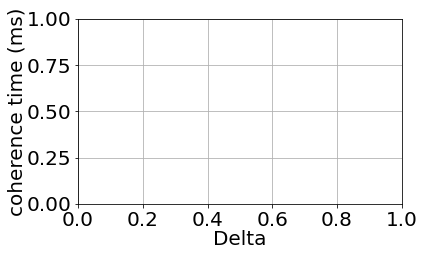

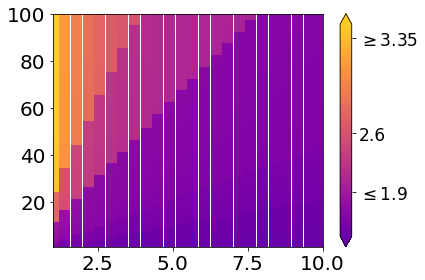

In [22]:
result_file_path = "../../QSN_results/QSN_results_final_maximizing_rate.csv" #for intermediate edge capacity 100 EPRps
result_file_path = "../../QSN_results/QSN_results_final_maximizing_rate_doceherence_assumption.csv" #for intermediate edge capacity 100 EPRps

each_coh_delata_ebit  ={}
τ_coh_values = []
delta_values = []
            
with open(result_file_path, "r") as f:
    reader = csv.reader( (line.replace('\0','') for line in f) )
    for line in reader:#t_max,i,request_fidelity_threshold,
#                                           storage_block_threshold,
#                                           storage_capacity,τ_coh,service_delay
        # print()
        t_max = int(line[0])
        i = line[1]
        request_fidelity_threshold= float(line[2])
        storage_block_threshold= float(line[3])
        storage_capacity = int(line[4])
        τ_coh = float(line[5])
        delta = float(line[6])
        objective_value = float(line[7])
        edge_capacity = int(line[8])
        if  ( t_max in [20] and request_fidelity_threshold in [0.9]  and 
             storage_block_threshold in [0.9] and 
           τ_coh <=100 and  delta <= 10 and    edge_capacity in [200] and storage_capacity in [1000]
            ):
            try:
                each_coh_delata_ebit[τ_coh,delta].append(objective_value)
            except:
                each_coh_delata_ebit[τ_coh,delta] = [objective_value]
                    
            if τ_coh not in τ_coh_values:
                τ_coh_values.append(τ_coh)
            if delta not in delta_values:
                delta_values.append(delta)

X = []
Y =[]
Z = []
rate_or_utility_values = []
τ_coh_values.sort()
delta_values.sort()
print("τ_coh_values ",τ_coh_values)
print("delta_values",delta_values)

for delta in delta_values:
    for τ_coh in τ_coh_values:
        if (τ_coh,delta) in each_coh_delata_ebit:
            ebits = each_coh_delata_ebit[τ_coh,delta]
            avg_ebits = sum(ebits)/len(ebits)
            X.append(delta)
            Y.append(τ_coh)
            Z.append(avg_ebits)

print("Z ",min(Z),sum(Z)/len(Z),max(Z))
plotting_3D("Delta","coherence time (ms)","Ebit rate",
                          20, 20, 20,
                          20, 0, 0,
                          0,0,
                          500,
                          X,Y,Z,round(min(Z),2),round(sum(Z)/len(Z),2)+0.4,round(max(Z),2),
                          False,True,
                          False,1,
                          24,"plots/3D_delta_coherence_ebit_rate.pdf",
                          False,3,6,3.6)

In [ ]:
import numpy as np
τ_coh_list = np.linspace(1,2,40)
print(τ_coh_list)

In [ ]:
# -*- coding: utf-8 -*-
"""HW1.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1Y6bs0pAuzSveY8svvbR7zr0l9c-eZCkl
"""

# Assuming bias=False reduces the parameter count in Conv2d layers

# Convolutional layers parameters (without bias)
# Updated counts based on the provided structure
conv_params_corrected = (3**2 * 3 * 64) + (3**2 * 64 * 128) + (3**2 * 128 * 256) + (3**2 * 256 * 256) + \
                        (3**2 * 256 * 512) + (3**2 * 512 * 512) * 3

# Batch Normalization layers parameters
# There are 8 BN layers, each corresponding to the output channels of Conv layers
bn_params_corrected = 2 * (64 + 128 + 2*256 + 4*512)

# Fully Connected layer parameters (correcting for including bias this time)
fc_params_corrected = 512 * 10 + 10  # Including bias

# Total parameters corrected
total_params_corrected = conv_params_corrected + bn_params_corrected + fc_params_corrected
total_params_corrected

In [ ]:
scheme_keys = ["AQM","Without AQM"]
τ_coh_values = [i for i in range(1000)]
each_scheme_each_coherence_time_workloads_percentage = {}
ploting_simple_y_as_x("Time (ms)","e2e fidelity",
                        22, 22, 20,
                      20, 0, 0,
                      0,0,False,[],max([1]),
                      
                      list(scheme_keys),
                      each_scheme_each_coherence_time_workloads_percentage,
                      τ_coh_values,τ_coh_values,
                      False,True,True,1,20,
                      "plots/AQM_e2e_f.pdf",True,2,6.4,3.8,False)

In [ ]:
scheme_keys = ["AQM","Without AQM"]
τ_coh_values = [i for i in range(1000)]
each_scheme_each_coherence_time_workloads_percentage = {}
ploting_simple_y_as_x("Number of flows","Avg request service \n delay (ms)",
                        22, 22, 20,
                      20, 0, 0,
                      0,0,False,[],max([1000]),
                      
                      list(scheme_keys),
                      each_scheme_each_coherence_time_workloads_percentage,
                      τ_coh_values,τ_coh_values,
                      False,True,True,1,20,
                      "plots/AQM_queue_delay.pdf",True,2,6.4,3.8,False)

In [ ]:
scheme_keys = ["AQM","Without AQM"]
τ_coh_values = [i for i in range(1000)]
each_scheme_each_coherence_time_workloads_percentage = {}
ploting_simple_y_as_x("Number of flows","Drop rate",
                        22, 22, 20,
                      20, 0, 0,
                      0,0,False,[],max([1]),
                      
                      list(scheme_keys),
                      each_scheme_each_coherence_time_workloads_percentage,
                      τ_coh_values,τ_coh_values,
                      False,True,True,1,20,
                      "plots/AQM_drop_rate.pdf",True,2,6.4,3.8,False)